In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, roc_auc_score

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560655 entries, 0 to 560654
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   0                                           560655 non-null  int64  
 1   Electricity:Facility [kW](Hourly)           560655 non-null  float64
 2   Fans:Electricity [kW](Hourly)               560655 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            560655 non-null  float64
 4   Heating:Electricity [kW](Hourly)            560655 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     560655 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  560655 non-null  float64
 7   Gas:Facility [kW](Hourly)                   560655 non-null  float64
 8   Heating:Gas [kW](Hourly)                    560655 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          560655 non-n

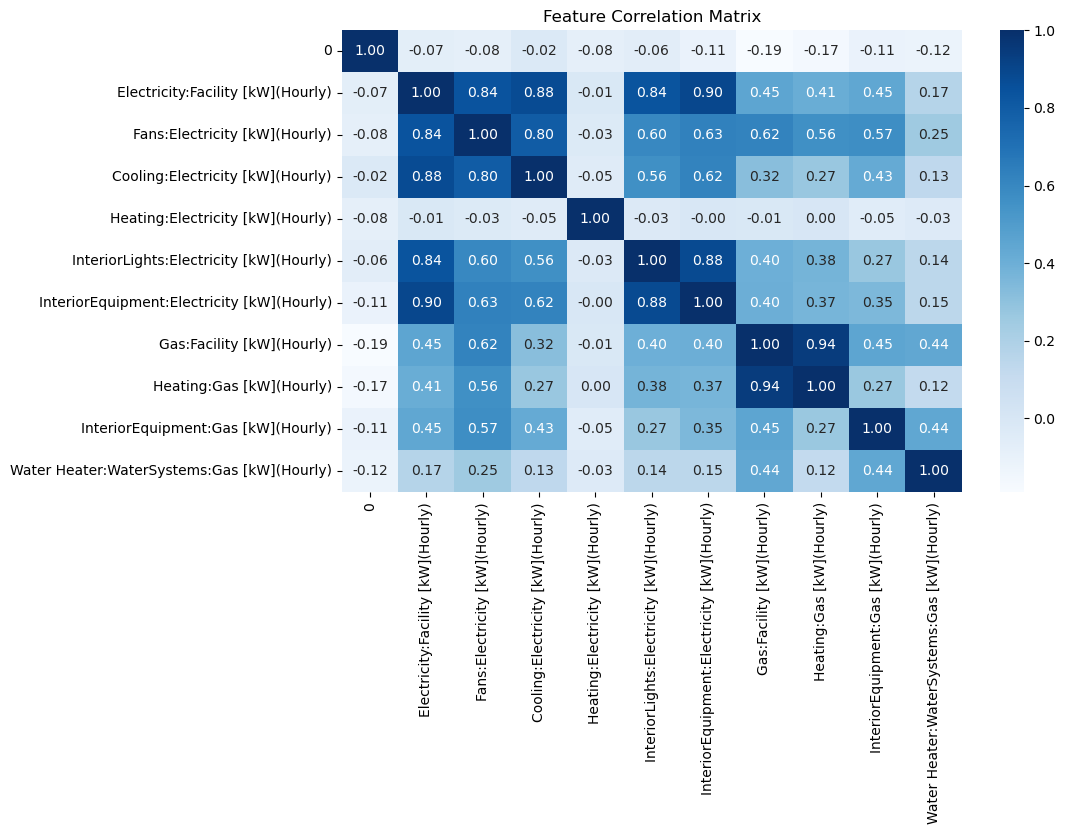

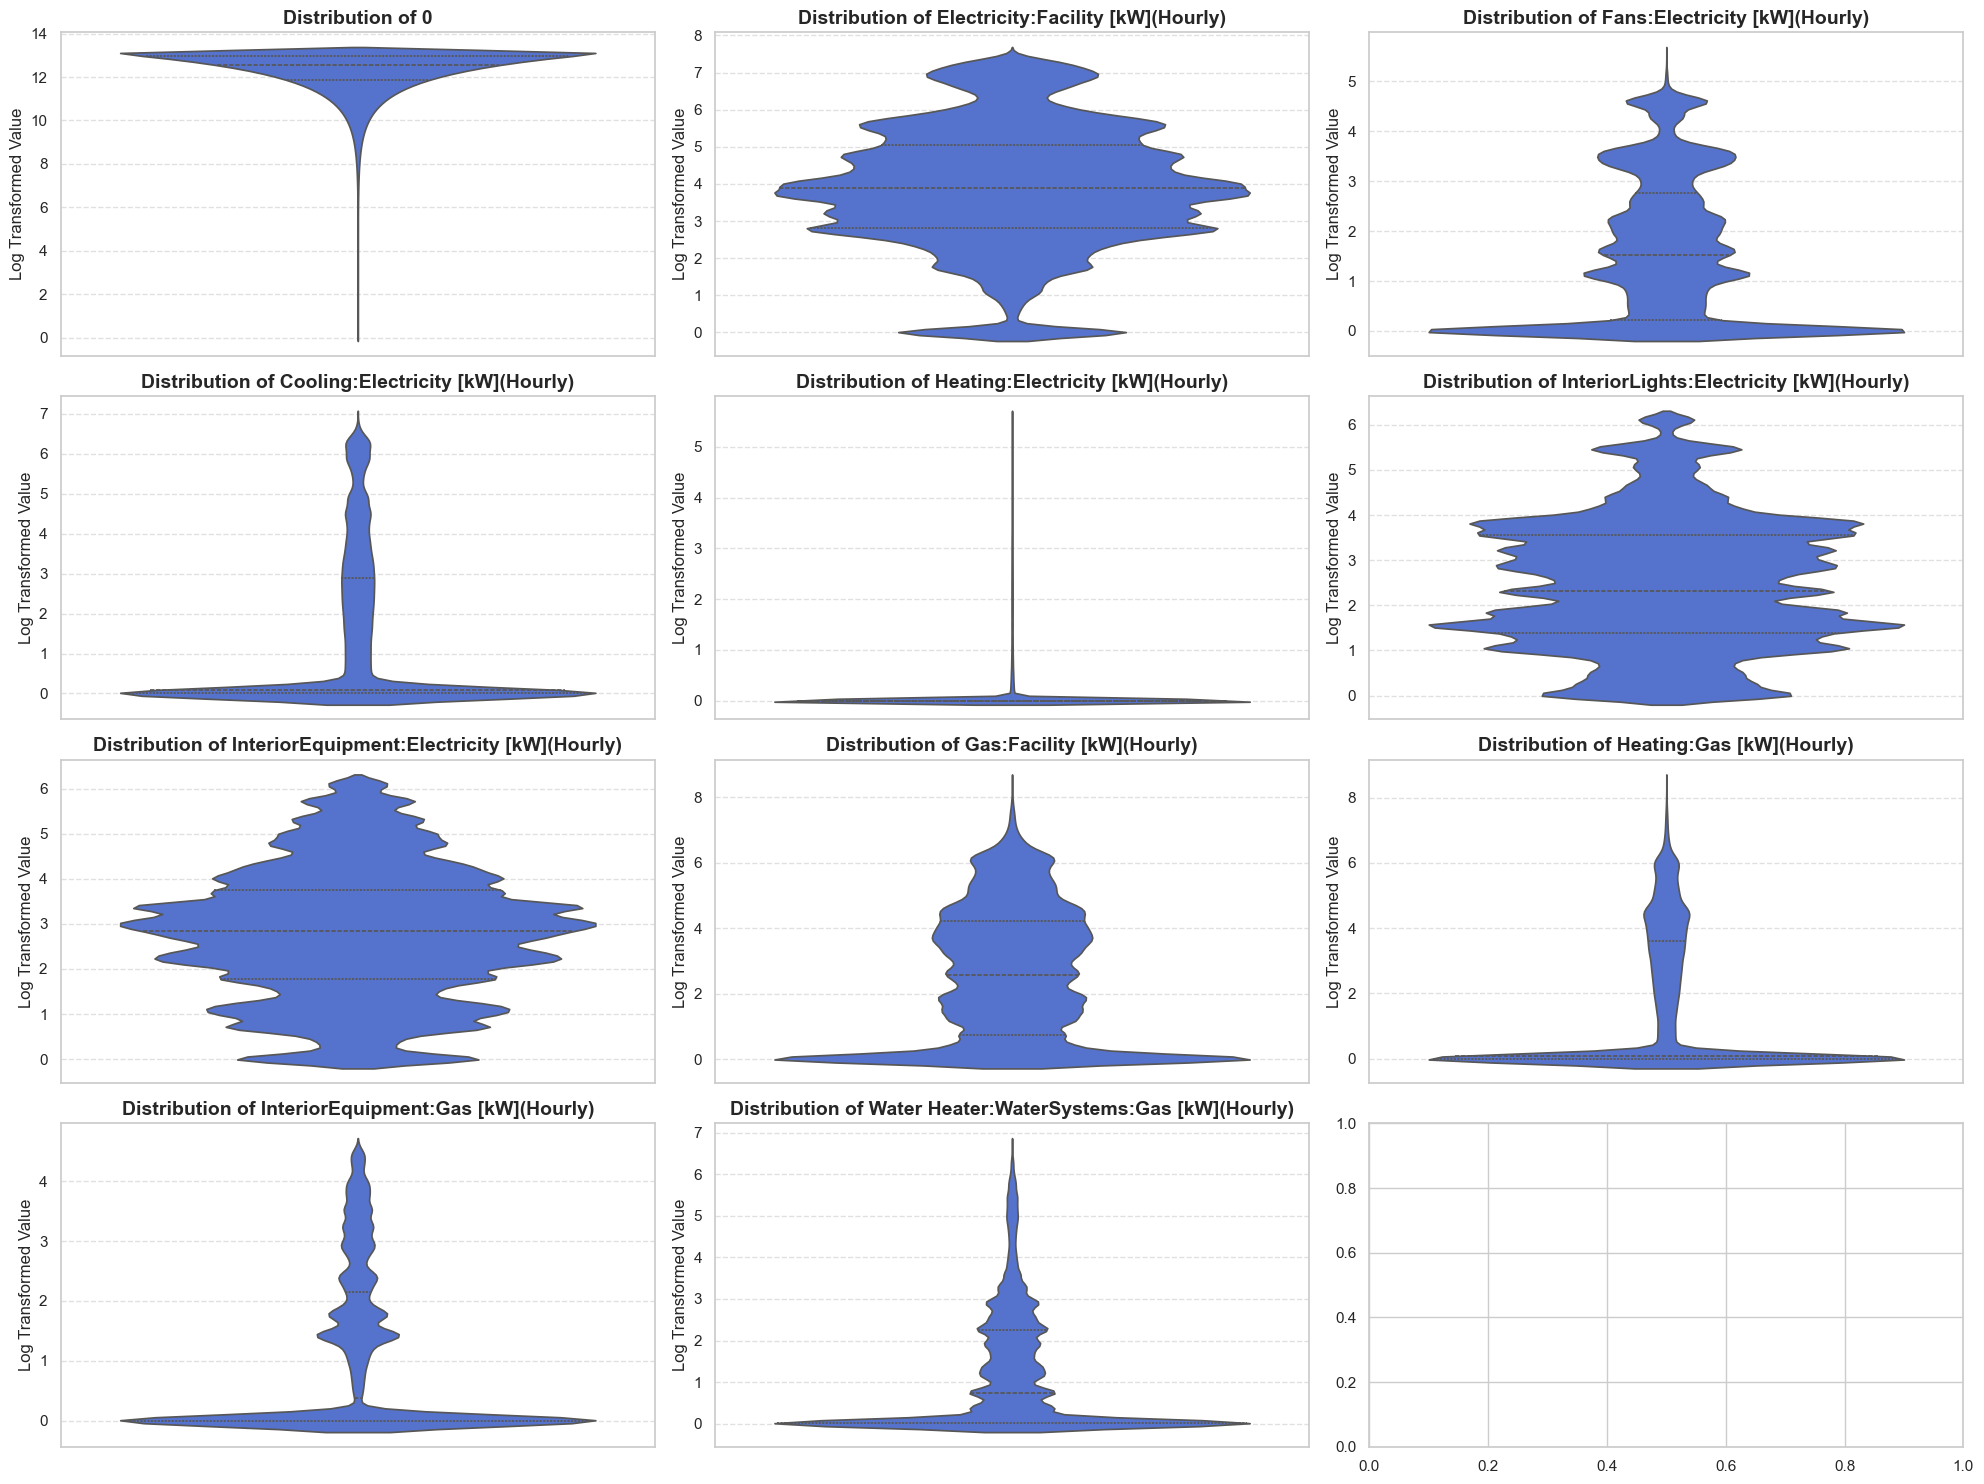

In [2]:



file_path = "df.csv"  
df = pd.read_csv(file_path)


print("Dataset Info:")
print(df.info())


print("\nFirst 5 rows of the dataset:")
print(df.head())


print("\nSummary Statistics:")
print(df.describe())


print("\nMissing Values:")
print(df.isnull().sum())


plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Set theme for aesthetics
sns.set_theme(style="whitegrid")

# Apply log transformation to handle skewness
df_log = np.log1p(df.select_dtypes(include=['number']))

# Define numerical columns
numerical_cols = df_log.columns

# Create subplots with improved spacing
fig, axes = plt.subplots(nrows=len(numerical_cols)//3 + 1, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(y=df_log[col], ax=axes[i], color="royalblue", inner="quartile")
    axes[i].set_title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("Log Transformed Value")
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()



In [3]:
# I did not do anyththing hehehe

In [6]:
df = pd.read_csv("df.csv")  # Replace with actual file path

# Encoding labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])
df["theft"] = label_encoder.fit_transform(df["theft"])
df["theft"].unique()

array([0, 5, 6, 2, 3, 4, 1])

In [5]:

# Splitting data
feature_cols = [
    "Electricity:Facility [kW](Hourly)", "Fans:Electricity [kW](Hourly)", "Cooling:Electricity [kW](Hourly)",
    "Heating:Electricity [kW](Hourly)", "InteriorLights:Electricity [kW](Hourly)", "InteriorEquipment:Electricity [kW](Hourly)",
    "Gas:Facility [kW](Hourly)", "Heating:Gas [kW](Hourly)", "InteriorEquipment:Gas [kW](Hourly)",
    "Water Heater:WaterSystems:Gas [kW](Hourly)"
]
X = df[feature_cols]
y = df["theft"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') if hasattr(model, "predict_proba") else None
    
    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred, average='weighted'),
        "Kappa": cohen_kappa_score(y_test, y_pred),
        "AUC": auc_score
    }
    print(f"Results for {name}:\n", results, "\n")
    return results


knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=50)
bagging = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=5)
ann = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=100)

In [7]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=50),
    "Bagging": BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10), n_estimators=10),
    "ANN": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=300)
}

# Train & evaluate each model separately
results = {name: evaluate_model(model, name) for name, model in models.items()}



Results for KNN:
 {'Accuracy': 0.8462066689853832, 'F1-score': 0.8147000135431823, 'Kappa': 0.7419857244988386, 'AUC': 0.9172891561014629} 

Results for DecisionTree:
 {'Accuracy': 0.8235010835540573, 'F1-score': 0.8200388168151728, 'Kappa': 0.7146224417648558, 'AUC': 0.8405990775359639} 

Results for RandomForest:
 {'Accuracy': 0.847910033799752, 'F1-score': 0.838449814474058, 'Kappa': 0.7520229377211136, 'AUC': 0.9206766226284698} 

Results for Bagging:
 {'Accuracy': 0.8460104698968172, 'F1-score': 0.8162290680899233, 'Kappa': 0.7418707013493939, 'AUC': 0.9214469966348087} 



c:\Users\HP\anaconda3\envs\IML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Results for ANN:
 {'Accuracy': 0.7880336392255487, 'F1-score': 0.7445736573695867, 'Kappa': 0.6321869239871479, 'AUC': 0.8931434004946678} 



### Our Work
- Need to increase n_estimators, try using pipeline and grid search
- SMOTE XGBOOST, PCA, DBN
- Increase RandomForest Trees → Set n_estimators=200 for better accuracy.
- Fix ANN Convergence → Use max_iter=500, change solver to 'sgd'.
- Run LightGBM & Stacking → Compare results with RF/Bagging.
- Analyze Confusion Matrices → Check where models fail.
- Fine-Tune Top Model → Optimize hyperparameters for the best performer.

In [3]:
# Base Improved
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier

# Load dataset
df = pd.read_csv("df.csv")  # Replace with actual file path

# Encoding categorical labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])
df["theft"] = label_encoder.fit_transform(df["theft"])

# Define features and target variable
feature_cols = [
    "Electricity:Facility [kW](Hourly)", "Fans:Electricity [kW](Hourly)", "Cooling:Electricity [kW](Hourly)",
    "Heating:Electricity [kW](Hourly)", "InteriorLights:Electricity [kW](Hourly)", "InteriorEquipment:Electricity [kW](Hourly)",
    "Gas:Facility [kW](Hourly)", "Heating:Gas [kW](Hourly)", "InteriorEquipment:Gas [kW](Hourly)",
    "Water Heater:WaterSystems:Gas [kW](Hourly)"
]
X = df[feature_cols]
y = df["theft"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') if hasattr(model, "predict_proba") else None
    
    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred, average='weighted'),
        "Kappa": cohen_kappa_score(y_test, y_pred),
        "AUC": auc_score
    }
    print(f"Results for {name}:\n", results, "\n")
    return results

# Define models with pipelines
pipelines = {
    "KNN": Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
    "DecisionTree": Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    "RandomForest": Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    "Bagging": Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', BaggingClassifier(KNeighborsClassifier()))
    ]),
    # "ANN": Pipeline([
    #     ('scaler', MinMaxScaler()),
    #     ('classifier', MLPClassifier(max_iter=500))
    # ])
}

# Define hyperparameter grids for GridSearchCV
param_grids = {
    "KNN": {"classifier__n_neighbors": [5, 10, 15]},
    "DecisionTree": {"classifier__max_depth": [5, 10, None]},
    "RandomForest": {"classifier__n_estimators": [50, 100, 200]},
    "Bagging": {"classifier__n_estimators": [5, 10, 20]},
    # "ANN": {"classifier__hidden_layer_sizes": [(20, 20), (50, 50)], "classifier__max_iter": [300, 500]}
}

# Perform GridSearchCV to optimize models
best_models = {}
for name, pipeline in pipelines.items():
    print(f"Optimizing {name}...")
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluate optimized models
final_results = {name: evaluate_model(model, name) for name, model in best_models.items()}

# Print final comparison
print("Final Model Comparison:\n", final_results)


Optimizing KNN...
Best parameters for KNN: {'classifier__n_neighbors': 5}
Optimizing DecisionTree...
Best parameters for DecisionTree: {'classifier__max_depth': None}
Optimizing RandomForest...
Best parameters for RandomForest: {'classifier__n_estimators': 200}
Optimizing Bagging...
Best parameters for Bagging: {'classifier__n_estimators': 20}
Results for KNN:
 {'Accuracy': 0.8508441019878535, 'F1-score': 0.8241530731010013, 'Kappa': 0.7508128292366791, 'AUC': 0.9064167122871825} 

Results for DecisionTree:
 {'Accuracy': 0.8237507914849596, 'F1-score': 0.8202590376626046, 'Kappa': 0.715045796551158, 'AUC': 0.8410553694763712} 

Results for RandomForest:
 {'Accuracy': 0.8484986310654502, 'F1-score': 0.838954506920786, 'Kappa': 0.753032302300997, 'AUC': 0.9222654756970766} 

Results for Bagging:
 {'Accuracy': 0.8516288983421177, 'F1-score': 0.8251300789896703, 'Kappa': 0.752146032481817, 'AUC': 0.9181188772930664} 

Final Model Comparison:
 {'KNN': {'Accuracy': 0.8508441019878535, 'F1-sc